In [73]:
import pandas as pd
import chardet
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, roc_auc_score, roc_curve, auc, f1_score
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
import numpy as np
import math
import joypy
from imblearn.under_sampling import RandomUnderSampler, EditedNearestNeighbours, TomekLinks
from imblearn.combine import SMOTETomek, SMOTEENN
from collections import Counter
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate 
from sklearn.feature_selection import SelectFromModel
from datetime import datetime
import matplotlib.ticker as ticker
from matplotlib.legend_handler import HandlerLine2D
#import ray 
import matplotlib.ticker as ticker
import matplotlib.ticker as mtick
from matplotlib.legend_handler import HandlerLine2D


from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import ADASYN
from imblearn.combine import SMOTETomek
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer, roc_auc_score, f1_score, precision_recall_curve, precision_recall_fscore_support


# py -m pip install matplotlib

In [120]:
df_private_MTPL = pd.read_csv('df_private.txt', sep="\t")

df_private_MTPL['Vehicle_age'] = pd.to_numeric(df_private_MTPL['Vehicle_age'], errors='coerce')
df_private_MTPL['GWP'] = pd.to_numeric(df_private_MTPL['GWP'], errors='coerce')
df_private_MTPL['number_of_claims'] = pd.to_numeric(df_private_MTPL['number_of_claims'], errors='coerce')
df_private_MTPL['Client_Age'] = pd.to_numeric(df_private_MTPL['Client_Age'], errors='coerce')
df_private_MTPL['Policy_Duration'] = pd.to_numeric(df_private_MTPL['Policy_Duration'], errors='coerce')
df_private_MTPL['Years_of_driving'] = pd.to_numeric(df_private_MTPL['Years_of_driving'], errors='coerce')

df_private_MTPL['PRODUCT'] = pd.Categorical(df_private_MTPL['PRODUCT'])
df_private_MTPL['Duration'] = pd.Categorical(df_private_MTPL['Duration'])
df_private_MTPL['Make'] = pd.Categorical(df_private_MTPL['Make'])
df_private_MTPL['vehicle_type_group_mapped'] = pd.Categorical(df_private_MTPL['vehicle_type_group_mapped'])
df_private_MTPL['City'] = pd.Categorical(df_private_MTPL['City'])
df_private_MTPL['Churn'] = pd.Categorical(df_private_MTPL['Churn'])
df_private_MTPL['Renewal'] = pd.Categorical(df_private_MTPL['Renewal'])
df_private_MTPL['Gender'] = pd.Categorical(df_private_MTPL['Gender'])
df_private_MTPL['Channel'] = pd.Categorical(df_private_MTPL['Channel'])


In [121]:
df = df_private_MTPL

# Kintamuju pervadinimai

In [122]:
df['City'] = df['City'].str.replace(' ', '\n')

In [123]:
df['City'] = df['City'].replace('Other', 'Kita')

In [124]:
df['City'].value_counts()

City
Vilnius                  29915
Kita                     23298
Kaunas                   22506
Panevėžys                 9888
Klaipėda                  8408
Alytus                    5345
Šiauliai                  3985
Kauno\nrajonas            3035
Vilniaus\nrajonas         2833
Alytaus\nrajonas          1685
Jonava                    1326
Marijampolė               1227
Klaipėdos\nrajonas        1209
Mažeikiai                 1204
Panevėžio\nrajonas        1028
Telšiai                    734
Marijampolės\nrajonas      541
Šiaulių\nrajonas           391
Unknown                     42
Name: count, dtype: int64

In [125]:
df['Duration'] = df['Duration'].replace('Long', 'Ilgalaikė')
df['Duration'] = df['Duration'].replace('Short', 'Trumpalaikė')

C:\Users\evelina.voleiso\AppData\Local\Temp\ipykernel_13388\2386585572.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Duration'] = df['Duration'].replace('Long', 'Ilgalaikė')
C:\Users\evelina.voleiso\AppData\Local\Temp\ipykernel_13388\2386585572.py:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Duration'] = df['Duration'].replace('Short', 'Trumpalaikė')


In [126]:
df['Make'] = df['Make'].replace('Other', 'Kita')

C:\Users\evelina.voleiso\AppData\Local\Temp\ipykernel_13388\4202522258.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df['Make'] = df['Make'].replace('Other', 'Kita')


In [127]:
df['vehicle_type_group_mapped'] = df['vehicle_type_group_mapped'].str.replace('6) Personal', 'Automobilis')
df['vehicle_type_group_mapped'] = df['vehicle_type_group_mapped'].str.replace('5) Motorcycle', 'Motociklas')
df['vehicle_type_group_mapped'] = df['vehicle_type_group_mapped'].str.replace('8) Tractor', 'Traktorius')
df['vehicle_type_group_mapped'] = df['vehicle_type_group_mapped'].str.replace('7) Trailer', 'Kemperis')
df['vehicle_type_group_mapped'] = df['vehicle_type_group_mapped'].str.replace('3) Delivery van', 'krovininis mikroautobusas')
df['vehicle_type_group_mapped'] = df['vehicle_type_group_mapped'].str.replace('4) Full trailer', 'Priekaba')
df['vehicle_type_group_mapped'] = df['vehicle_type_group_mapped'].str.replace('2) Truck over 3,5T', 'Sunkvežimis')

In [128]:
df['vehicle_type_group_mapped'] = df['vehicle_type_group_mapped'].str.replace(' ', '\n')

In [129]:
df['Make'] = df['Make'].str.replace(' ', '\n')

In [130]:
df['Channel'] = df['Channel'].str.replace('Key Account', 'Svarbių klientų')
df['Channel'] = df['Channel'].str.replace('Call Center', 'Skambučių centras')
df['Channel'] = df['Channel'].str.replace('E-Sales', 'El. Prekyba')
df['Channel'] = df['Channel'].str.replace('Broker', 'Brokeriai')
df['Channel'] = df['Channel'].str.replace('Affinity', 'Partnerių alternatyvių pardavimų')
df['Channel'] = df['Channel'].str.replace('Own Network', 'Pardavimų tinklas')
df['Channel'] = df['Channel'].str.replace('Direct Corporate Sales', 'Tiesioginių verslo klientų')

In [82]:
df['Renewal'] = df['Renewal'].replace(0, 'Neatnaujinta')
df['Renewal'] = df['Renewal'].replace(1, 'Atnaujinta')

In [83]:
df['Gender'] = df['Gender'].str.replace('Male', 'Vyrai')
df['Gender'] = df['Gender'].str.replace('Female', 'Moterys')

In [132]:
pd.options.display.float_format = '{:.2f}'.format

df.describe()

Vehicle_age       GWP  number_of_claims  Policy_Duration  Client_Age  Years_of_driving
count    118600.00 118600.00         118600.00        118600.00   118600.00         118600.00
mean         12.95     34.73              0.09           238.95       43.00             19.22
std           5.36     28.58              0.36           147.11       13.88             10.57
min           0.00     -0.04              0.00            27.00       18.00              0.00
25%          10.00     14.00              0.00            89.00       33.00             12.00
50%          13.00     30.79              0.00           364.00       41.00             19.00
75%          16.00     45.50              0.00           365.00       52.00             25.00
max          69.00   1270.00              9.00           365.00       90.00             70.00

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118600 entries, 0 to 118599
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   PRODUCT                    118600 non-null  category
 1   Duration                   118600 non-null  category
 2   Vehicle_age                118600 non-null  float64 
 3   Make                       118600 non-null  object  
 4   GWP                        118600 non-null  float64 
 5   vehicle_type_group_mapped  118600 non-null  object  
 6   number_of_claims           118600 non-null  float64 
 7   Channel                    118600 non-null  object  
 8   Churn                      118600 non-null  int64   
 9   Renewal                    118600 non-null  category
 10  Policy_Duration            118600 non-null  int64   
 11  Gender                     118600 non-null  object  
 12  Client_Age                 118600 non-null  float64 
 13  City          

In [86]:
categorical_df = df.select_dtypes(include=['category', 'object'])


In [ ]:
pd.set_option('display.max_rows', None)  # None means show all rows
pd.set_option('display.max_columns', None)  # None means show all columns
pd.set_option('display.width', 1000)  # Set the width of the display for wrapping
pd.set_option('display.max_colwidth', None)  # Display full content of each column

summary_data = []

# Function to calculate count and proportion
def get_summary(column):
    counts = categorical_df[column].value_counts().reset_index()
    counts.columns = ['Value', 'Count']
    counts['Proportion (%)'] = (counts['Count'] / counts['Count'].sum() * 100).round(2)
    counts.insert(0, 'Variable', column)
    return counts

# Append each categorical column's data
for column in categorical_df.columns:
    summary_data.append(get_summary(column))

# Combine all data into a single DataFrame
summary_df = pd.concat(summary_data, ignore_index=True)

# Display the table
print(summary_df)

In [ ]:
latex_table = summary_df.to_latex(index=False, column_format="lccc", header=True, escape=False)

# Print the LaTeX table
print(latex_table)

In [ ]:
import matplotlib.pyplot as plt

# Assuming df['Churn'].value_counts() has already been calculated
churn_counts = df['Churn'].value_counts()

# Prepare labels and sizes for the pie chart
labels = ['Nenutrauktos sutartys', 'Nutrauktos sutartys']  # Convert indices to string if they aren't already
sizes = churn_counts.values

# Determine explode settings: explode the smallest slice
explode = tuple(0.1 if x == min(sizes) else 0 for x in sizes)

# Define colors
colors = ['#22235F', '#8A6BBE']
if sizes[0] < sizes[1]:
    colors.reverse()

# Create pie chart
fig, ax = plt.subplots(figsize=(9, 8))
wedges, texts, autotexts = ax.pie(
    sizes, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90, 
    colors=colors, textprops={'fontsize': 14, 'color': 'black'}, 
    wedgeprops={'edgecolor': 'white'}
)

# Change the color of the percentage texts to white
for autotext in autotexts:
    autotext.set_color('white')

ax.set_title('Sutarčių pasiskirstymas (%)', fontsize=20, pad=30)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [87]:
import matplotlib.ticker as ticker
import matplotlib.ticker as mtick
from matplotlib.legend_handler import HandlerLine2D

In [124]:
g=df['Gender'].value_counts()
g

Gender
Vyrai      72542
Moterys    34915
Name: count, dtype: int64

Churn rates by city:
Vyrai: 5.59%
Moterys: 5.33%

Vyrai has the highest churn rate.


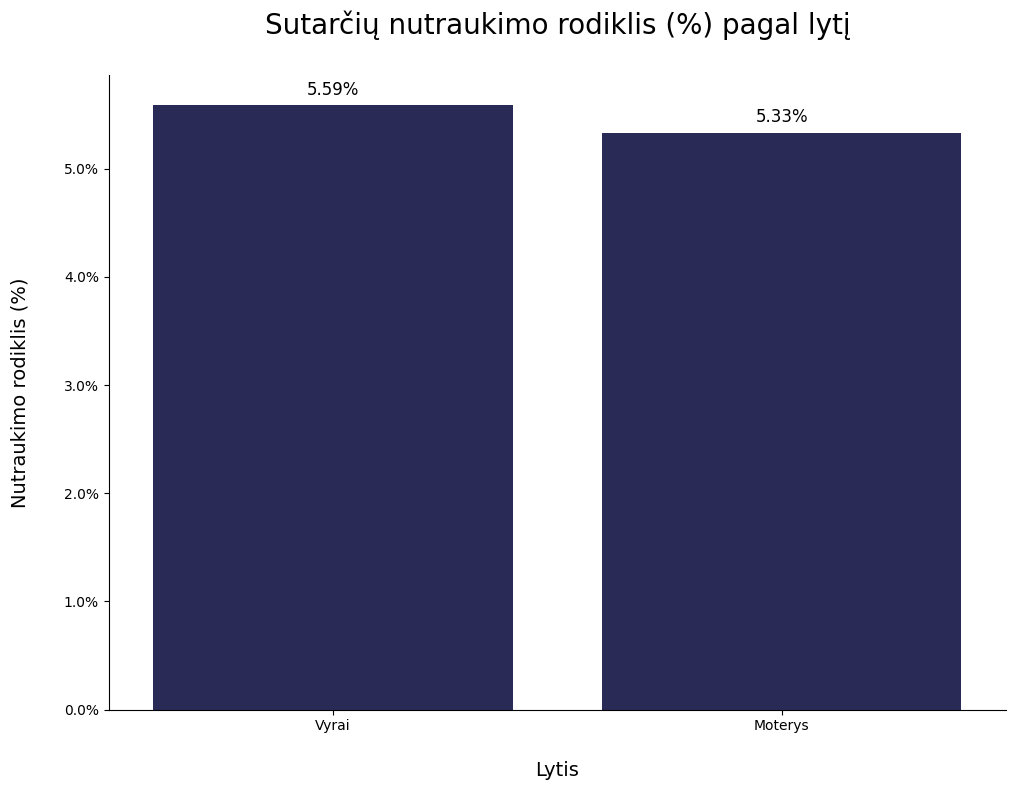

In [94]:
# LYTIS

df = pd.DataFrame(df)

df['Churn'] = pd.to_numeric(df['Churn'], errors='coerce')

categories = df['Gender'].unique()

churners_by_category = {}
clients_by_category = {}




for category in categories:
    churners_by_category[category] = df[df['Gender'] == category]['Churn'].sum()
    clients_by_category[category] = len(df[df['Gender'] == category])


churn_rate_by_category = {category: (churners_by_category[category] / clients_by_category[category]) * 100 * 0.6 for category in categories}


print("Churn rates by city:")
for city, churn_rate in churn_rate_by_category.items():
    print(f"{city}: {churn_rate:.2f}%")

max_churn_category = max(churn_rate_by_category, key=churn_rate_by_category.get)
print("\n{} has the highest churn rate.".format(max_churn_category))

churn_rate_df = pd.DataFrame(churn_rate_by_category.items(), columns=['Category', 'Churn Rate'])

sorted_churn_rate_df = churn_rate_df.sort_values('Churn Rate', ascending=False)

plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Category', y='Churn Rate', data=sorted_churn_rate_df, color='#22235F')
plt.xticks(rotation=0)
plt.title('Sutarčių nutraukimo rodiklis (%) pagal lytį', fontsize=20, pad=30)
plt.xlabel('Lytis', fontsize=14, labelpad=20)
plt.ylabel('Nutraukimo rodiklis (%)', fontsize=14, labelpad=25)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1, 
            '{:1.2f}%'.format(height),
            ha="center",
            fontsize=12)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()


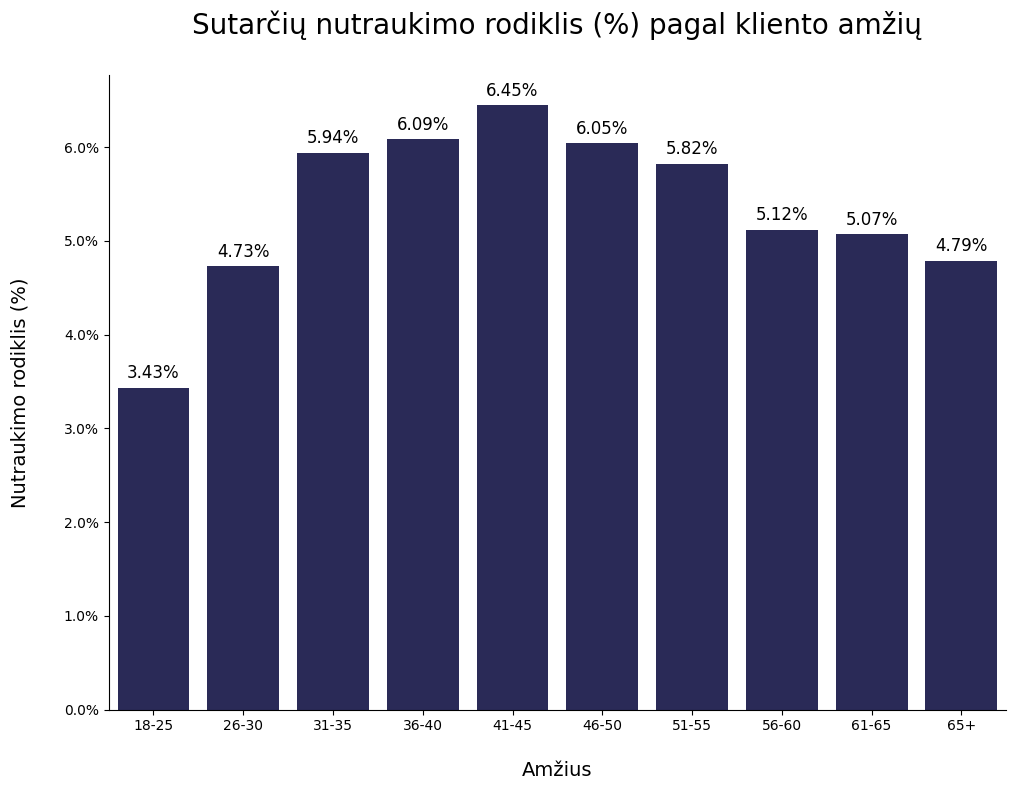

In [97]:
df = pd.DataFrame(df)

age_groups = [(18, 26), (26, 31), (31, 36), (36, 41), (41, 46), (46, 51), (51, 56), (56, 61), (61, 66)]

def categorize_age(age, age_groups):
    for lower, upper in age_groups:
        if lower <= age < upper:
            return f'{lower}-{upper - 1}'
    return '65+'

df['Age_Group'] = df['Client_Age'].apply(lambda age: categorize_age(age, age_groups))

churn_rate_by_age_group = df.groupby('Age_Group').agg({
    'Churn': 'sum',
    'Client_Age': 'count'
}).rename(columns={'Client_Age': 'Total_Clients'}).reset_index()

churn_rate_by_age_group['Churn Rate'] = (churn_rate_by_age_group['Churn'] / churn_rate_by_age_group['Total_Clients']) * 100 * 0.6

#sorted_churn_rate_by_age_group = churn_rate_by_age_group.sort_values('Churn Rate', ascending=False)

plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Age_Group', y='Churn Rate', data=churn_rate_by_age_group, color='#22235F')
plt.xticks(rotation=0)
plt.title('Sutarčių nutraukimo rodiklis (%) pagal kliento amžių', fontsize=20, pad=30)
plt.xlabel('Amžius', fontsize=14, labelpad=20)
plt.ylabel('Nutraukimo rodiklis (%)', fontsize=14, labelpad=25)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1, 
            '{:1.2f}%'.format(height),
            ha="center",
            fontsize=12)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()

Churn rates by city:
Kita: 5.26%
Vilnius: 4.75%
Kaunas: 5.25%
Vilniaus
rajonas: 6.27%
Klaipėda: 5.15%
Kauno
rajonas: 5.22%
Klaipėdos
rajonas: 6.70%
Panevėžio
rajonas: 7.18%
Panevėžys: 6.33%
Šiauliai: 6.22%
Telšiai: 4.82%
Jonava: 9.32%
Alytus: 7.59%
Alytaus
rajonas: 8.51%
Mažeikiai: 4.44%
Šiaulių
rajonas: 4.91%
Marijampolė: 6.31%
Marijampolės
rajonas: 7.21%
Unknown: 5.71%

Jonava has the highest churn rate.


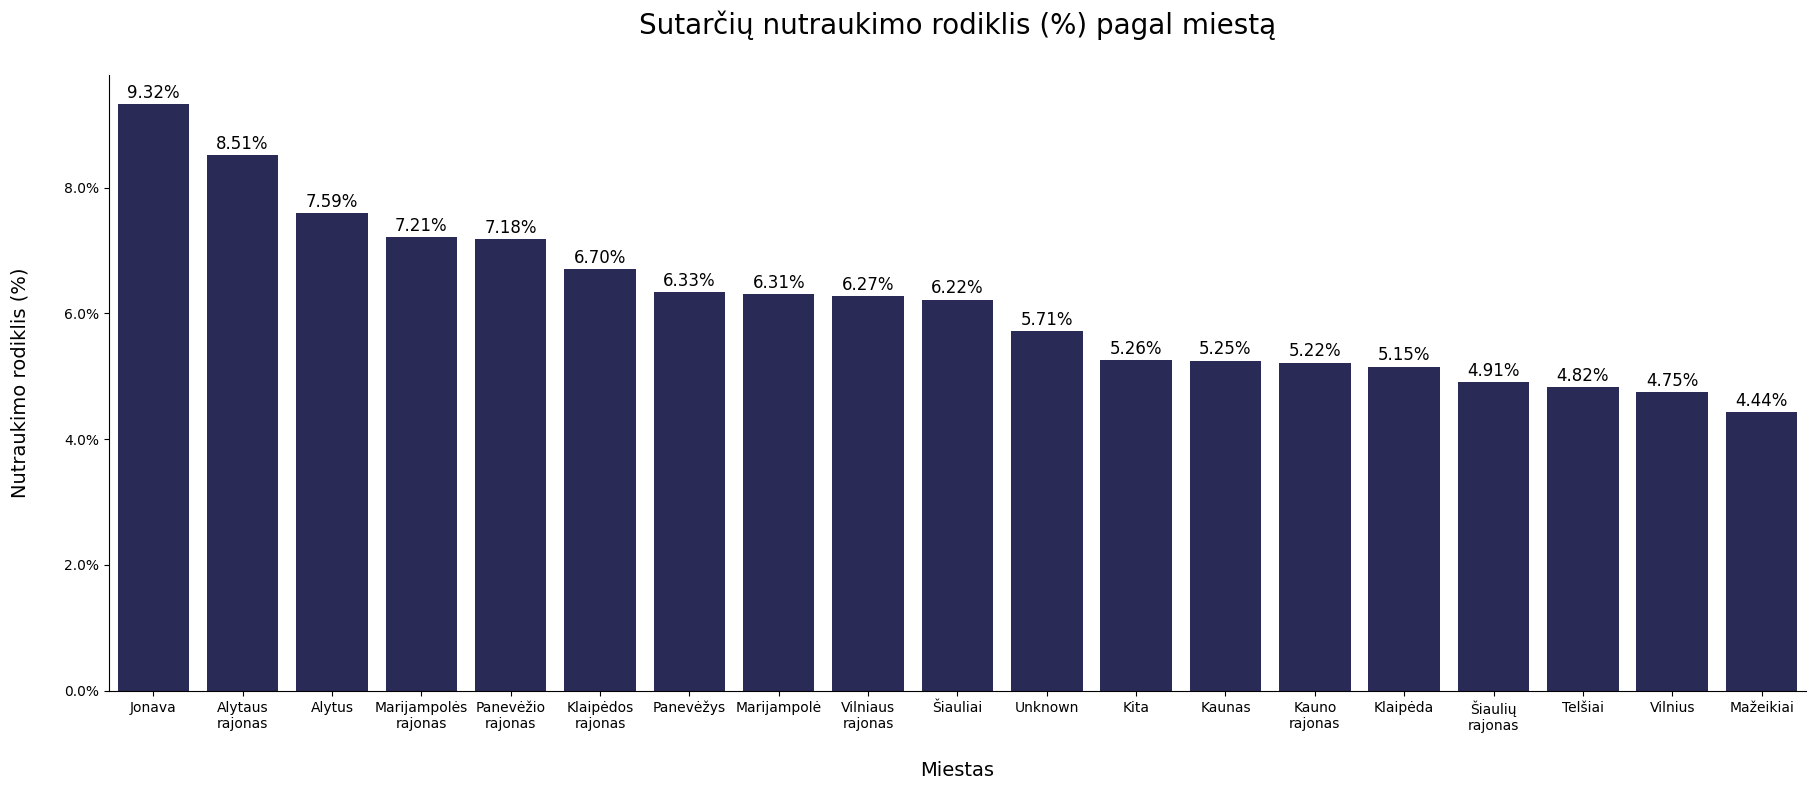

In [103]:
# CHURN RATE 



categories = df['City'].unique()

churners_by_category = {}
clients_by_category = {}



for category in categories:
    churners_by_category[category] = df[df['City'] == category]['Churn'].sum()
    clients_by_category[category] = len(df[df['City'] == category])


churn_rate_by_category = {category: (churners_by_category[category] / clients_by_category[category]) * 100 * 0.6 for category in categories}


print("Churn rates by city:")
for city, churn_rate in churn_rate_by_category.items():
    print(f"{city}: {churn_rate:.2f}%")

max_churn_category = max(churn_rate_by_category, key=churn_rate_by_category.get)
print("\n{} has the highest churn rate.".format(max_churn_category))

churn_rate_df = pd.DataFrame(churn_rate_by_category.items(), columns=['Category', 'Churn Rate'])

sorted_churn_rate_df = churn_rate_df.sort_values('Churn Rate', ascending=False)

plt.figure(figsize=(18, 8))
ax = sns.barplot(x='Category', y='Churn Rate', data=sorted_churn_rate_df, color='#22235F')
plt.xticks(rotation=0)
plt.title('Sutarčių nutraukimo rodiklis (%) pagal miestą', fontsize=20, pad=30)
plt.xlabel('Miestas', fontsize=14, labelpad=20)
plt.ylabel('Nutraukimo rodiklis (%)', fontsize=14, labelpad=25)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1, 
            '{:1.2f}%'.format(height),
            ha="center",
            fontsize=12)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()


C:\Users\evelina.voleiso\AppData\Local\Temp\ipykernel_13388\3567797228.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_driving_experience_group = df.groupby('Driving_Experience_Group').agg({


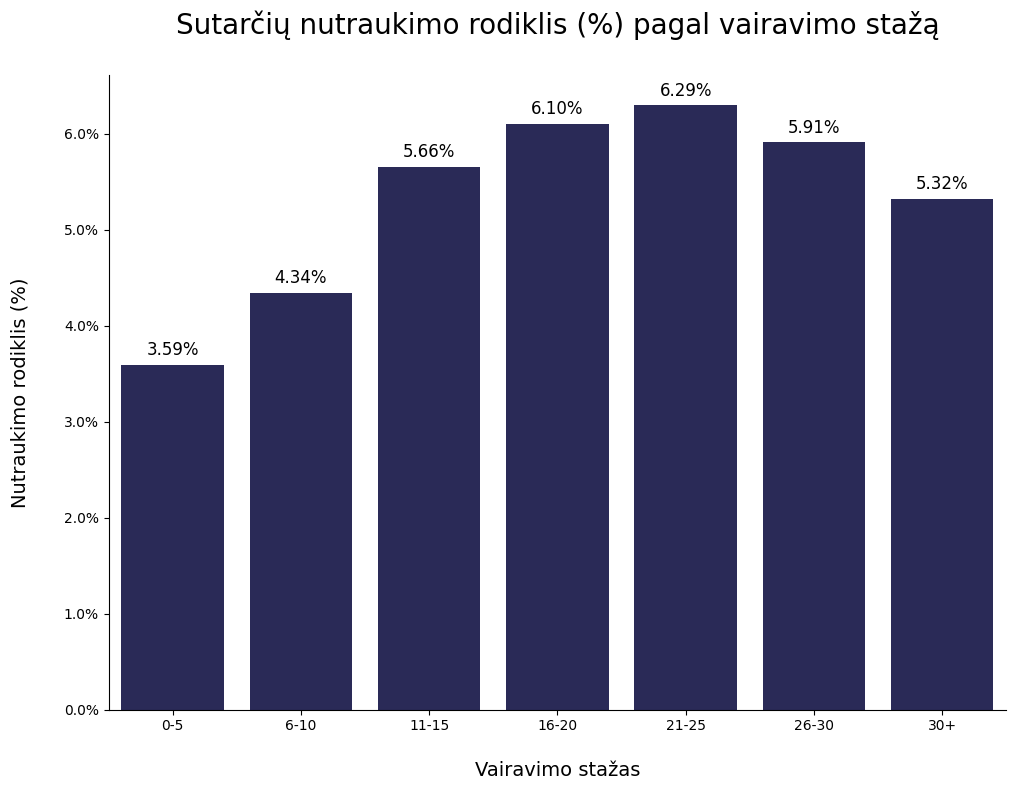

In [104]:


driving_experience_groups = [(0, 6), (6, 11), (11, 16), (16, 21), (21, 26), (26, 31)]

def categorize_driving_experience(years, driving_experience_groups):
    for lower, upper in driving_experience_groups:
        if lower <= years < upper:
            return f'{lower}-{upper - 1}'
    return '30+'

df['Driving_Experience_Group'] = df['Years_of_driving'].apply(lambda years: categorize_driving_experience(years, driving_experience_groups))

churn_rate_by_driving_experience_group = df.groupby('Driving_Experience_Group').agg({
    'Churn': 'sum',
    'Years_of_driving': 'count'
}).rename(columns={'Years_of_driving': 'Total_Drivers'}).reset_index()


experience_order = ['0-5', '6-10', '11-15', '16-20', '21-25', '26-30', '30+']
df['Driving_Experience_Group'] = pd.Categorical(df['Driving_Experience_Group'], categories=experience_order, ordered=True)

# Sort the DataFrame by 'Driving_Experience_Group' using the ordered categorical
churn_rate_by_driving_experience_group = df.groupby('Driving_Experience_Group').agg({
    'Churn': 'sum',
    'Years_of_driving': 'count'
}).rename(columns={'Years_of_driving': 'Total_Drivers'}).reset_index()

churn_rate_by_driving_experience_group['Churn Rate'] = (churn_rate_by_driving_experience_group['Churn'] / churn_rate_by_driving_experience_group['Total_Drivers']) * 100 * 0.6

churn_rate_by_driving_experience_group['Driving_Experience_Group'] = pd.Categorical(
    churn_rate_by_driving_experience_group['Driving_Experience_Group'],
    categories=experience_order,
    ordered=True
)

churn_rate_by_driving_experience_group = churn_rate_by_driving_experience_group.sort_values('Driving_Experience_Group')

plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Driving_Experience_Group', y='Churn Rate', data=churn_rate_by_driving_experience_group, color='#22235F')
plt.xticks(rotation=0)
plt.title('Sutarčių nutraukimo rodiklis (%) pagal vairavimo stažą', fontsize=20, pad=30)
plt.xlabel('Vairavimo stažas', fontsize=14, labelpad=20)
plt.ylabel('Nutraukimo rodiklis (%)', fontsize=14, labelpad=25)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1, 
            '{:1.2f}%'.format(height),
            ha="center",
            fontsize=12)


ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()

Churn rates by city:
Automobilis: 5.68%
krovininis
mikroautobusas: 5.39%
Kemperis: 2.15%
Motociklas: 2.03%
Priekaba: 4.62%
Traktorius: 6.35%
Sunkvežimis: 20.00%

Sunkvežimis has the highest churn rate.


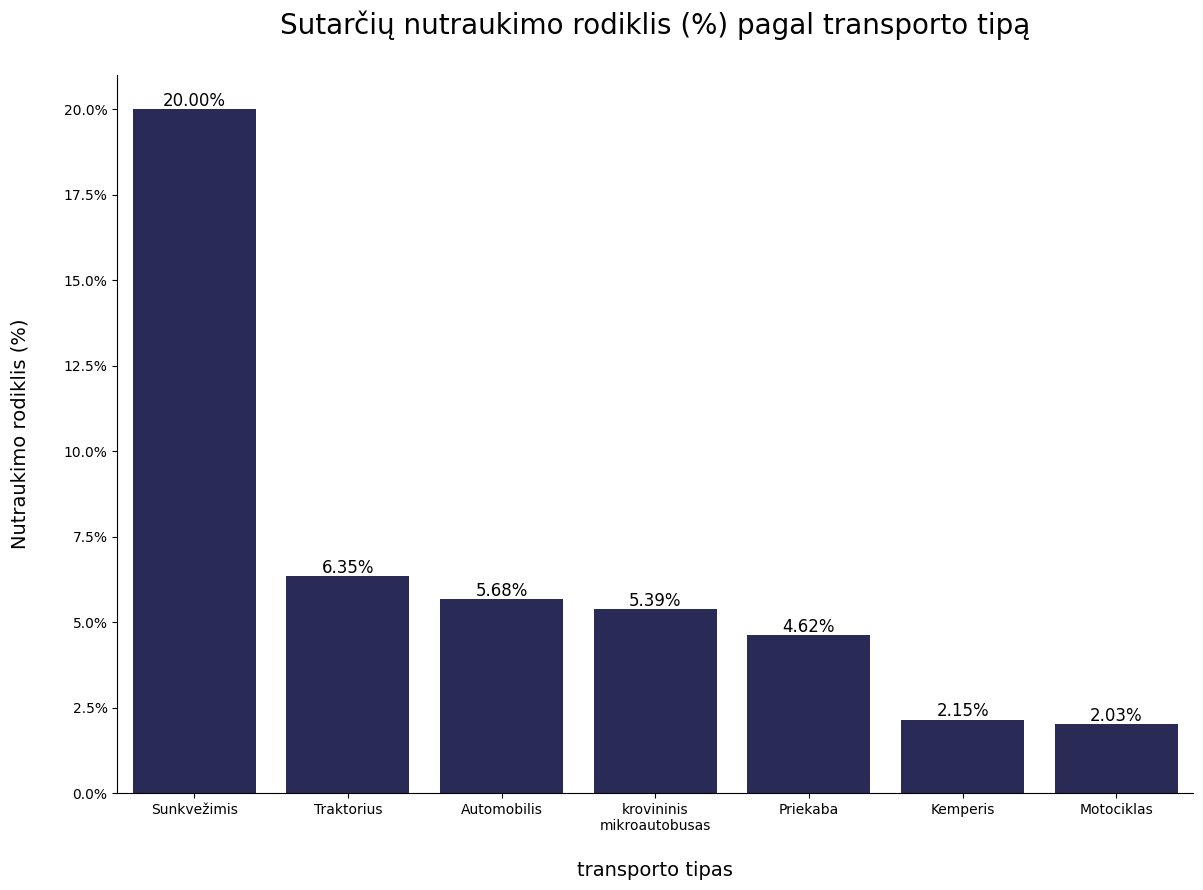

In [105]:
# CHURN RATE 


df['vehicle_type_group_mapped'] = df['vehicle_type_group_mapped'].str.replace(r'\d+\)', '', regex=True).str.strip()

# Filter out the "Unknown" category
df = df[df['vehicle_type_group_mapped'] != 'Unknown']

df['vehicle_type_group_mapped'] = df['vehicle_type_group_mapped'].str.replace('Bus', 'Autobusas')

categories = df['vehicle_type_group_mapped'].unique()

churners_by_category = {}
clients_by_category = {}




for category in categories:
    churners_by_category[category] = df[df['vehicle_type_group_mapped'] == category]['Churn'].sum()
    clients_by_category[category] = len(df[df['vehicle_type_group_mapped'] == category])


churn_rate_by_category = {category: (churners_by_category[category] / clients_by_category[category]) * 100 * 0.6 for category in categories}


print("Churn rates by city:")
for city, churn_rate in churn_rate_by_category.items():
    print(f"{city}: {churn_rate:.2f}%")

max_churn_category = max(churn_rate_by_category, key=churn_rate_by_category.get)
print("\n{} has the highest churn rate.".format(max_churn_category))

churn_rate_df = pd.DataFrame(churn_rate_by_category.items(), columns=['Category', 'Churn Rate'])

sorted_churn_rate_df = churn_rate_df.sort_values('Churn Rate', ascending=False)

plt.figure(figsize=(12, 9))
ax = sns.barplot(x='Category', y='Churn Rate', data=sorted_churn_rate_df, color='#22235F')
plt.xticks(rotation=0)
plt.title('Sutarčių nutraukimo rodiklis (%) pagal transporto tipą', fontsize=20, pad=30)
plt.xlabel('transporto tipas', fontsize=14, labelpad=20)
plt.ylabel('Nutraukimo rodiklis (%)', fontsize=14, labelpad=25)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1, 
            '{:1.2f}%'.format(height),
            ha="center",
            fontsize=12)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()



CHRYSLER has the highest churn rate.


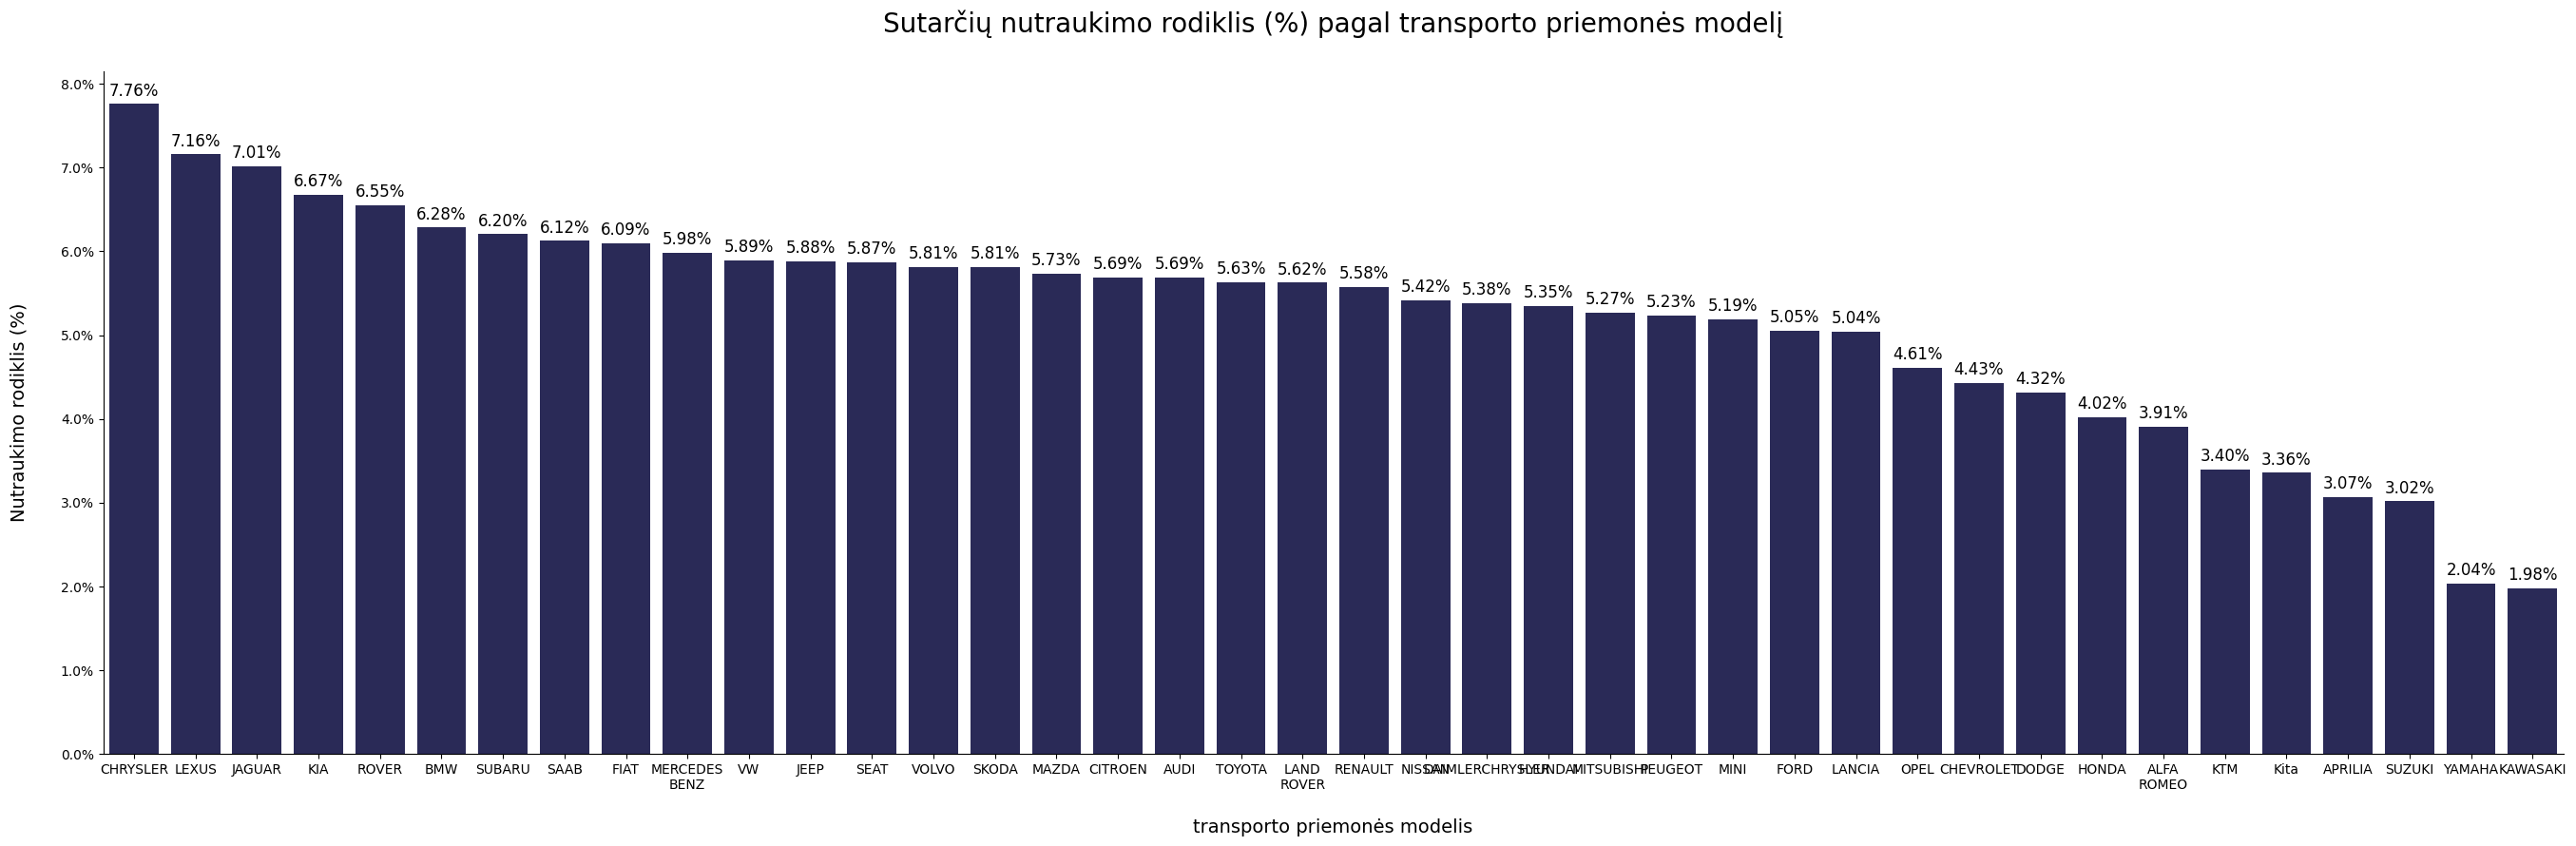

In [109]:
# CHURN RATE 



categories = df['Make'].unique()

churners_by_category = {}
clients_by_category = {}




for category in categories:
    churners_by_category[category] = df[df['Make'] == category]['Churn'].sum()
    clients_by_category[category] = len(df[df['Make'] == category])


churn_rate_by_category = {category: (churners_by_category[category] / clients_by_category[category]) * 100 * 0.6 for category in categories}


max_churn_category = max(churn_rate_by_category, key=churn_rate_by_category.get)
print("\n{} has the highest churn rate.".format(max_churn_category))

churn_rate_df = pd.DataFrame(churn_rate_by_category.items(), columns=['Category', 'Churn Rate'])

sorted_churn_rate_df = churn_rate_df.sort_values('Churn Rate', ascending=False)

plt.figure(figsize=(27, 9))
ax = sns.barplot(x='Category', y='Churn Rate', data=sorted_churn_rate_df, color='#22235F')
plt.xticks(rotation=0)
plt.title('Sutarčių nutraukimo rodiklis (%) pagal transporto priemonės modelį', fontsize=20, pad=30)
plt.xlabel('transporto priemonės modelis', fontsize=14, labelpad=20)
plt.ylabel('Nutraukimo rodiklis (%)', fontsize=14, labelpad=25)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1, 
            '{:1.2f}%'.format(height),
            ha="center",
            fontsize=12)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()



1.0 has the highest churn rate.


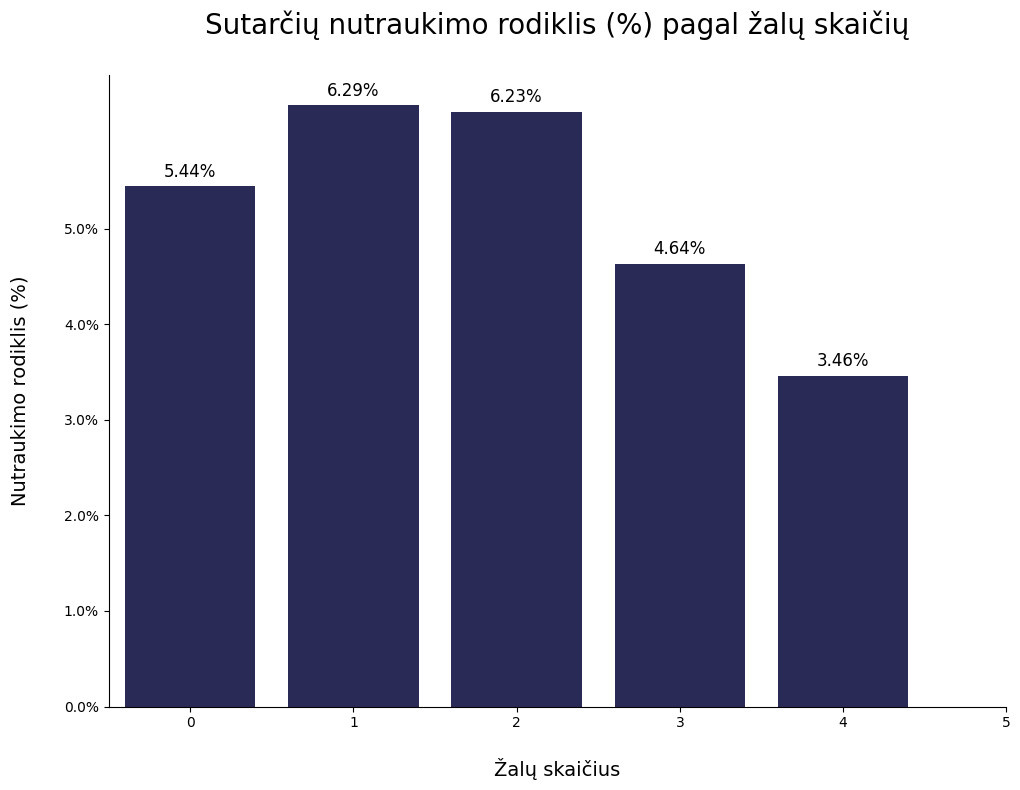

In [112]:
# CHURN RATE 


df['number_of_claims'] = pd.Categorical(df['number_of_claims'])
# Filter out the "Unknown" category
#df = df[df['number_of_claims'] != 'Unknown']


categories = df['number_of_claims'].unique()

churners_by_category = {}
clients_by_category = {}




for category in categories:
    churners_by_category[category] = df[df['number_of_claims'] == category]['Churn'].sum()
    clients_by_category[category] = len(df[df['number_of_claims'] == category])


churn_rate_by_category = {category: (churners_by_category[category] / clients_by_category[category]) * 100 * 0.6 for category in categories}



max_churn_category = max(churn_rate_by_category, key=churn_rate_by_category.get)
print("\n{} has the highest churn rate.".format(max_churn_category))

churn_rate_df = pd.DataFrame(churn_rate_by_category.items(), columns=['Category', 'Churn Rate'])
churn_rate_df = churn_rate_df[churn_rate_df['Churn Rate'] > 0]

sorted_churn_rate_df = churn_rate_df.sort_values('Churn Rate', ascending=False)

plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Category', y='Churn Rate', data=sorted_churn_rate_df, color='#22235F')
plt.xticks(rotation=0)
plt.title('Sutarčių nutraukimo rodiklis (%) pagal žalų skaičių', fontsize=20, pad=30)
plt.xlabel('Žalų skaičius', fontsize=14, labelpad=20)
plt.ylabel('Nutraukimo rodiklis (%)', fontsize=14, labelpad=25)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1, 
            '{:1.2f}%'.format(height),
            ha="center",
            fontsize=12)
    
plt.xticks(ticks=np.arange(len(corr_matrix.columns)), labels=[str(int(tick)) for tick in np.arange(len(corr_matrix.columns))])
plt.yticks(ticks=np.arange(len(corr_matrix.columns)), labels=[str(int(tick)) for tick in np.arange(len(corr_matrix.columns))])

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()


In [114]:
# CHURN RATE 



categories = df['Duration'].unique()

churners_by_category = {}
clients_by_category = {}




for category in categories:
    churners_by_category[category] = df[df['Duration'] == category]['Churn'].sum()
    clients_by_category[category] = len(df[df['Duration'] == category])


churn_rate_by_category = {category: (churners_by_category[category] / clients_by_category[category]) * 100 * 0.6 for category in categories}


max_churn_category = max(churn_rate_by_category, key=churn_rate_by_category.get)
print("\n{} has the highest churn rate.".format(max_churn_category))

churn_rate_df = pd.DataFrame(churn_rate_by_category.items(), columns=['Category', 'Churn Rate'])

sorted_churn_rate_df = churn_rate_df.sort_values('Churn Rate', ascending=False)

plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Category', y='Churn Rate', data=sorted_churn_rate_df, color='#22235F')
plt.xticks(rotation=0)
plt.title('Sutarčių nutraukimo rodiklis (%) pagal sutarties tipą', fontsize=20, pad=30)
plt.xlabel('Sutarties tipas', fontsize=14, labelpad=20)
plt.ylabel('Nutraukimo rodiklis (%)', fontsize=14, labelpad=25)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1, 
            '{:1.2f}%'.format(height),
            ha="center",
            fontsize=12)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()



Ilgalaikė has the highest churn rate.



Tiesioginių verslo klientų has the highest churn rate.


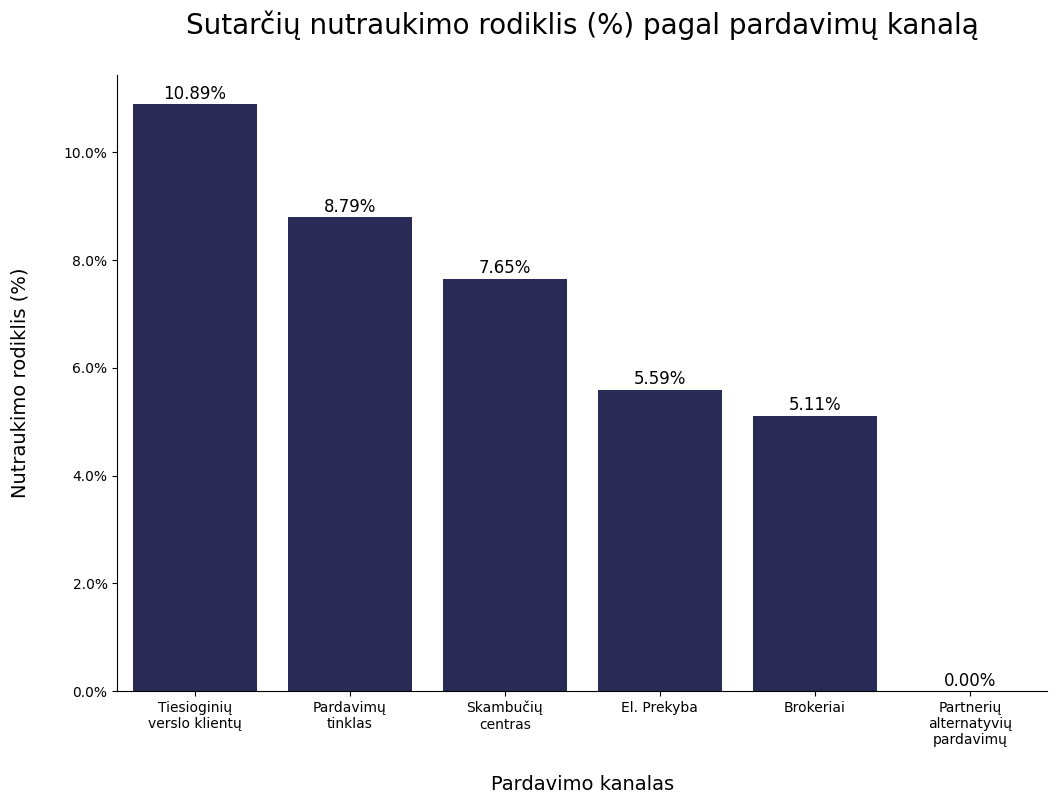

In [134]:
# CHURN RATE 
import textwrap



# Filter out the "Unknown" category
#df = df[df['number_of_claims'] != 'Unknown']
df['Churn'] = pd.to_numeric(df['Churn'], errors='coerce')


categories = df['Channel'].unique()

churners_by_category = {}
clients_by_category = {}




for category in categories:
    churners_by_category[category] = df[df['Channel'] == category]['Churn'].sum()
    clients_by_category[category] = len(df[df['Channel'] == category])


churn_rate_by_category = {category: (churners_by_category[category] / clients_by_category[category]) * 100 * 0.6 for category in categories}



max_churn_category = max(churn_rate_by_category, key=churn_rate_by_category.get)
print("\n{} has the highest churn rate.".format(max_churn_category))

churn_rate_df = pd.DataFrame(churn_rate_by_category.items(), columns=['Category', 'Churn Rate'])

def add_line_breaks(text, max_length=15):
    # Split the text at max_length characters
    return '\n'.join(textwrap.wrap(text, max_length))

# Apply the function to each category name
churn_rate_df['Category'] = churn_rate_df['Category'].apply(add_line_breaks)

sorted_churn_rate_df = churn_rate_df.sort_values('Churn Rate', ascending=False)



plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Category', y='Churn Rate', data=sorted_churn_rate_df, color='#22235F')
plt.xticks(rotation=0)
plt.title('Sutarčių nutraukimo rodiklis (%) pagal pardavimų kanalą', fontsize=20, pad=30)
plt.xlabel('Pardavimo kanalas', fontsize=14, labelpad=20)
plt.ylabel('Nutraukimo rodiklis (%)', fontsize=14, labelpad=25)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1, 
            '{:1.2f}%'.format(height),
            ha="center",
            fontsize=12)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()


C:\Users\evelina.voleiso\AppData\Local\Temp\ipykernel_13388\2965217704.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_Policy_Duration_groups = df.groupby('Policy_Duration_groups').agg({


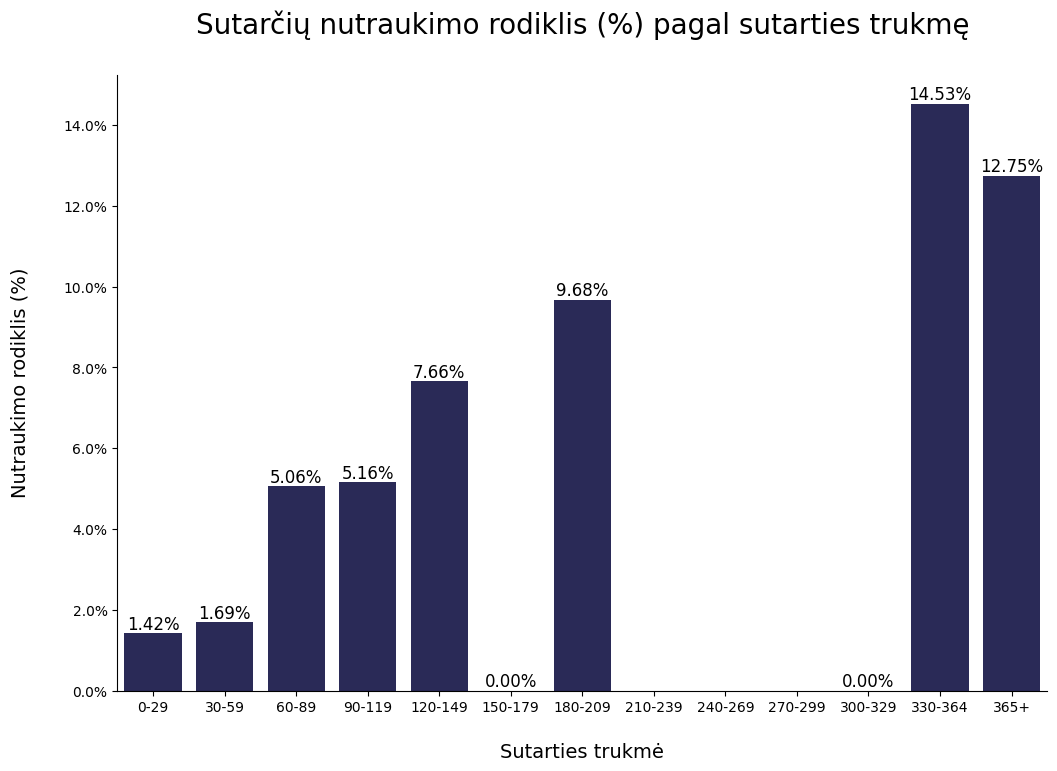

In [119]:


Policy_Duration_groups = [(0, 30), (30, 60), (60, 90), (90, 120), (120, 150), (150, 180), (180, 210), (210, 240), (240, 270), (270, 300), (300, 330), (330, 365)]

def categorize_driving_experience(years, Policy_Duration_groups):
    for lower, upper in Policy_Duration_groups:
        if lower <= years < upper:
            return f'{lower}-{upper - 1}'
    return '365+'

df['Policy_Duration_groups'] = df['Policy_Duration'].apply(lambda years: categorize_driving_experience(years, Policy_Duration_groups))

duration_order = [f'{lower}-{upper - 1}' for (lower, upper) in Policy_Duration_groups] + ['365+']

df['Policy_Duration_groups'] = pd.Categorical(df['Policy_Duration_groups'], categories=duration_order, ordered=True)

churn_rate_by_Policy_Duration_groups = df.groupby('Policy_Duration_groups').agg({
    'Churn': 'sum',
    'Policy_Duration': 'count'
}).rename(columns={'Policy_Duration': 'Total_Drivers'}).reset_index()

churn_rate_by_Policy_Duration_groups['Churn Rate'] = (churn_rate_by_Policy_Duration_groups['Churn'] / churn_rate_by_Policy_Duration_groups['Total_Drivers']) * 100

plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Policy_Duration_groups', y='Churn Rate', data=churn_rate_by_Policy_Duration_groups, color='#22235F')
plt.xticks(rotation=0)
plt.title('Sutarčių nutraukimo rodiklis (%) pagal sutarties trukmę', fontsize=20, pad=30)
plt.xlabel('Sutarties trukmė', fontsize=14, labelpad=20)
plt.ylabel('Nutraukimo rodiklis (%)', fontsize=14, labelpad=25)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1, 
            '{:1.2f}%'.format(height),
            ha="center",
            fontsize=12)


ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()

C:\Users\evelina.voleiso\AppData\Local\Temp\ipykernel_13388\1792494698.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_policy_price_group = df.groupby('Policy_Price_Group').agg({


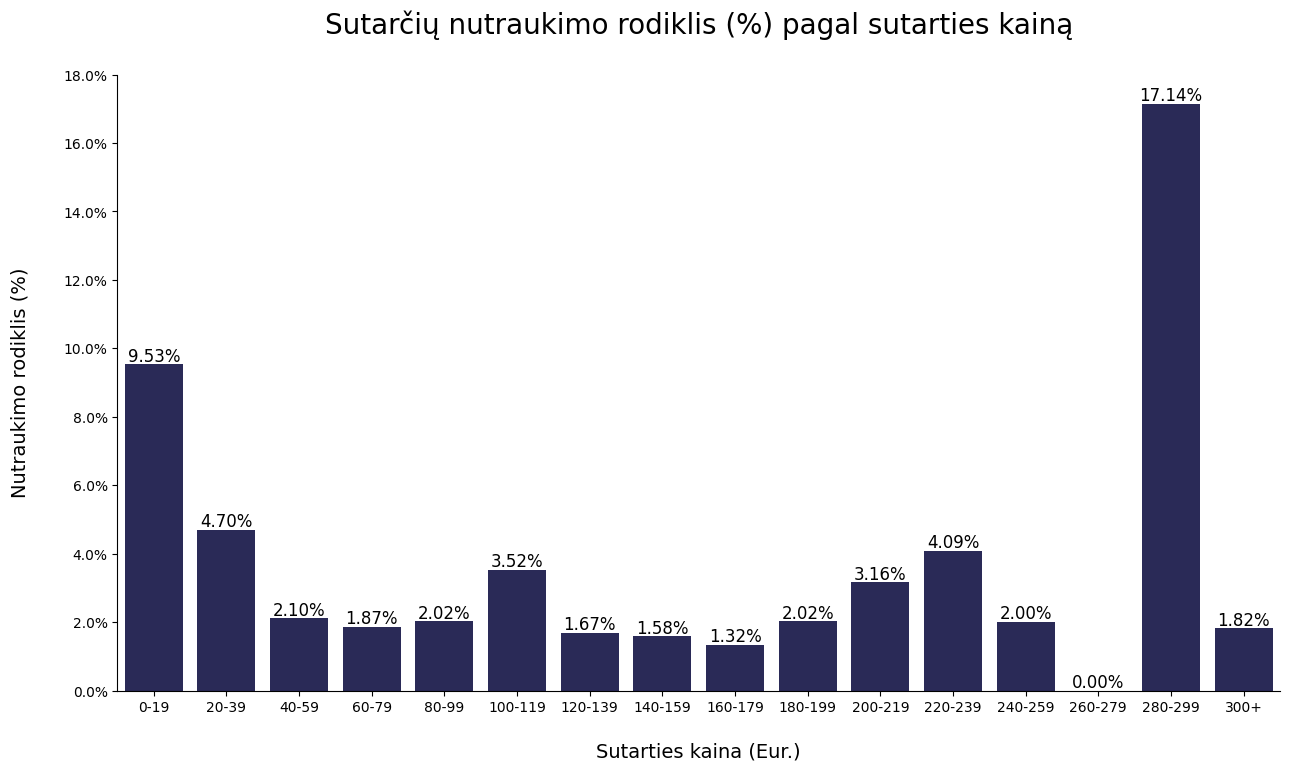

In [137]:


max_price = df['GWP'].max()
bins = list(range(0, 301, 20)) + [max_price]

bins[-2] = 300
bins[-1] = 300 + max_price

bin_labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-2)] + ['300+']

df['Policy_Price_Group'] = pd.cut(df['GWP'], bins=bins, labels=bin_labels, right=False)

churn_rate_by_policy_price_group = df.groupby('Policy_Price_Group').agg({
    'Churn': 'sum',
    'GWP': 'count'
}).rename(columns={'GWP': 'Total_Policies'}).reset_index()

churn_rate_by_policy_price_group['Churn Rate'] = (churn_rate_by_policy_price_group['Churn'] / churn_rate_by_policy_price_group['Total_Policies']) * 100 * 0.6

sorted_churn_rate_by_policy_price_group = churn_rate_by_policy_price_group.sort_values('Policy_Price_Group', ascending=True)

plt.figure(figsize=(15, 8))
ax = sns.barplot(x='Policy_Price_Group', y='Churn Rate', data=sorted_churn_rate_by_policy_price_group, color='#22235F')
plt.xticks(rotation=0)
plt.title('Sutarčių nutraukimo rodiklis (%) pagal sutarties kainą', fontsize=20, pad=30)
plt.xlabel('Sutarties kaina (Eur.)', fontsize=14, labelpad=20)
plt.ylabel('Nutraukimo rodiklis (%)', fontsize=14, labelpad=25)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1, 
            '{:1.2f}%'.format(height),
            ha="center",
            fontsize=12)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()

In [106]:


vehicle_age_groups = [(0, 5), (5, 10), (10, 15), (15, 20), (20, 25), (25, 30)]

def categorize_vehicle_age(vehicle_age, vehicle_age_groups):
    for lower, upper in vehicle_age_groups:
        if lower <= vehicle_age < upper:
            return f'{lower}-{upper - 1}'
    return '30+'

df['Vehicle_Age_Group'] = df['Vehicle_age'].apply(lambda age: categorize_vehicle_age(age, vehicle_age_groups))

# Define the order of categories as they should appear on the x-axis
category_order = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30+']

# Convert 'Vehicle_Age_Group' to a categorical type with the defined order
df['Vehicle_Age_Group'] = pd.Categorical(df['Vehicle_Age_Group'], categories=category_order, ordered=True)

churn_rate_by_vehicle_age_group = df.groupby('Vehicle_Age_Group').agg({
    'Churn': 'sum',
    'Vehicle_age': 'count'
}).rename(columns={'Vehicle_age': 'Total_Vehicles'}).reset_index()

# Calculate churn rate
churn_rate_by_vehicle_age_group['Churn Rate'] = (churn_rate_by_vehicle_age_group['Churn'] / churn_rate_by_vehicle_age_group['Total_Vehicles']) * 100 * 0.6

# Make sure to sort the DataFrame by the categorical column before plotting
churn_rate_by_vehicle_age_group = churn_rate_by_vehicle_age_group.sort_values('Vehicle_Age_Group')


plt.figure(figsize=(12, 9))
ax = sns.barplot(x='Vehicle_Age_Group', y='Churn Rate', data=churn_rate_by_vehicle_age_group, color='#22235F')
plt.xticks(rotation=0)
plt.title('Sutarčių nutraukimo rodiklis (%) pagal transporto priemonės amžių', fontsize=20, pad=30)
plt.xlabel('Transporto priemonės amžius (metais)', fontsize=14, labelpad=20)
plt.ylabel('Nutraukimo rodiklis (%)', fontsize=14, labelpad=25)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 0.1, 
            '{:1.2f}%'.format(height),
            ha="center",
            fontsize=12)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())

plt.show()

C:\Users\evelina.voleiso\AppData\Local\Temp\ipykernel_13388\2986620790.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate_by_vehicle_age_group = df.groupby('Vehicle_Age_Group').agg({


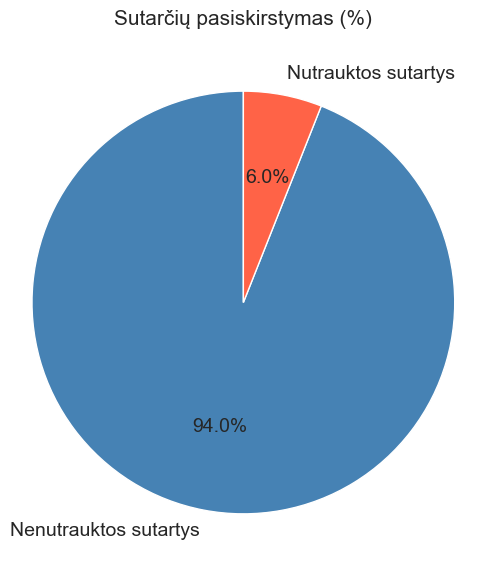

In [78]:
churn_counts = df['Churn'].value_counts(normalize=True) * 100 * x
sns.set(style="whitegrid") 

fig, ax = plt.subplots(figsize=(6, 7))
ax.pie(churn_counts, labels=['Nenutrauktos sutartys', 'Nutrauktos sutartys'], autopct='%1.1f%%', startangle=90, colors=['#4682B4', '#FF6347'],  textprops={'fontsize': 14})
ax.set_title('Sutarčių pasiskirstymas (%)', fontsize=15)
ax.axis('equal')  

plt.show()

C:\Users\evelina.voleiso\AppData\Local\Temp\ipykernel_28948\2546452668.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



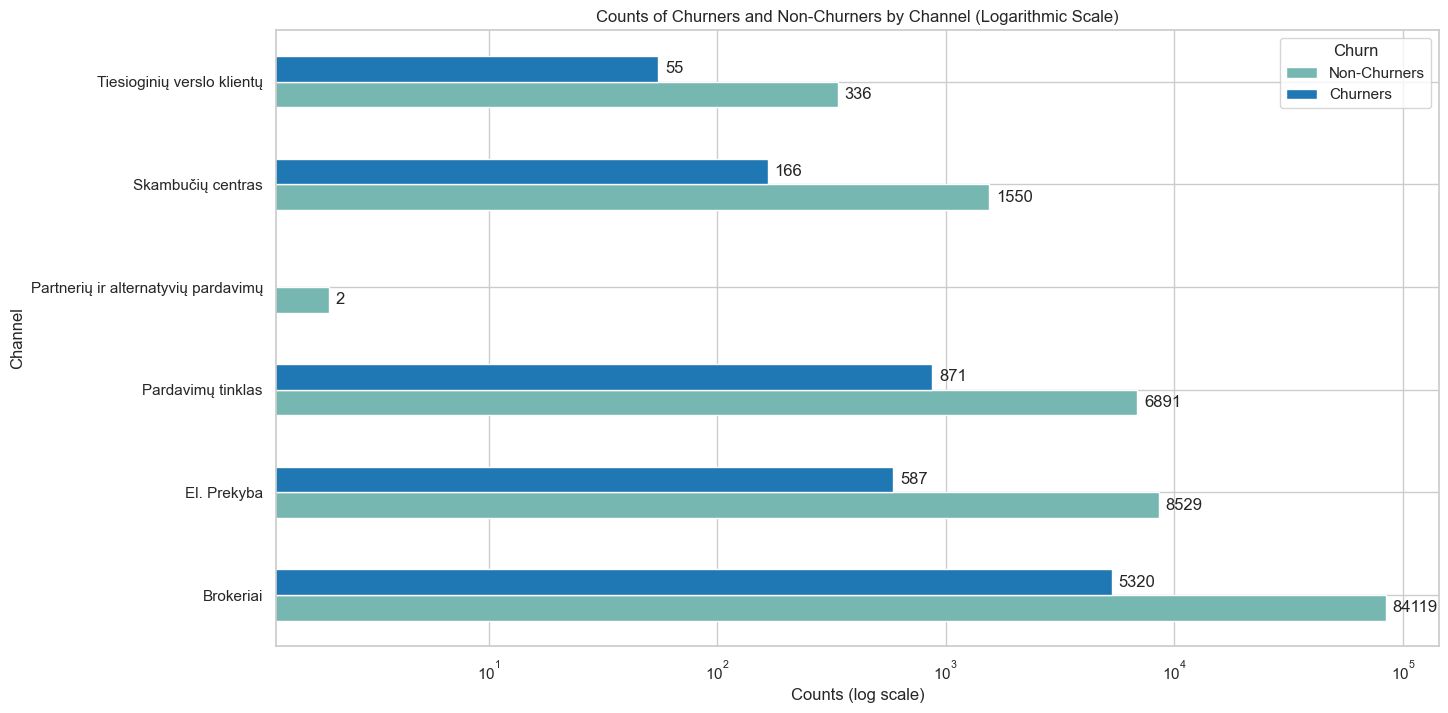

In [173]:
churn_counts = df.groupby(['Channel', 'Churn']).size().unstack(fill_value=0)

fig, ax = plt.subplots(figsize=(15, 8))  # Increased figure size, particularly the width
colors = ['#76b7b2', '#1f77b4']  # First color for Non-Churners, second for Churners
bar_plot = churn_counts.plot(kind='barh', color=colors, ax=ax, logx=True)  # Note the logx=True parameter

ax.set_xlabel('Counts (log scale)')
ax.set_title('Counts of Churners and Non-Churners by Channel (Logarithmic Scale)')
ax.legend(['Non-Churners', 'Churners'], title='Churn')

# Annotate values next to the bars
for p in bar_plot.patches:
    # Check if the width of the bar is zero (to avoid log of zero errors)
    if p.get_width() > 0:
        ax.annotate(format(p.get_width(), '.0f'), 
                    (p.get_width(), p.get_y() + p.get_height() / 2), 
                    ha='left', va='center', 
                    xytext=(5, 0),  # Slight horizontal offset
                    textcoords='offset points')

plt.show()

In [51]:
df = pd.DataFrame(df_private_MTPL, index=['Vehicle_age', 'GWP', 'number_of_claims', 'Policy_Duration', 'Client_Age', 'Years_of_driving'])
new_labels = ['TP amžius', 'GWP', 'Žalų skaičius', 'Poliso trukmė', 'Asmens amžius', 'Vairavimo stažas']

In [53]:
df

PRODUCT Duration  Vehicle_age Make  GWP vehicle_type_group_mapped  number_of_claims Channel Churn Renewal  Policy_Duration Gender  Client_Age City  Years_of_driving
Vehicle_age          NaN      NaN          NaN  NaN  NaN                       NaN               NaN     NaN   NaN     NaN              NaN    NaN         NaN  NaN               NaN
GWP                  NaN      NaN          NaN  NaN  NaN                       NaN               NaN     NaN   NaN     NaN              NaN    NaN         NaN  NaN               NaN
number_of_claims     NaN      NaN          NaN  NaN  NaN                       NaN               NaN     NaN   NaN     NaN              NaN    NaN         NaN  NaN               NaN
Policy_Duration      NaN      NaN          NaN  NaN  NaN                       NaN               NaN     NaN   NaN     NaN              NaN    NaN         NaN  NaN               NaN
Client_Age           NaN      NaN          NaN  NaN  NaN                       NaN               NaN     NaN   NaN     NaN              NaN    NaN         NaN  NaN               NaN
Years_of_driving     NaN      NaN          NaN  NaN  NaN                       NaN               NaN     NaN   NaN     NaN              NaN    NaN         NaN  NaN               NaN

C:\Users\evelina.voleiso\AppData\Roaming\Python\Python312\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\evelina.voleiso\AppData\Roaming\Python\Python312\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


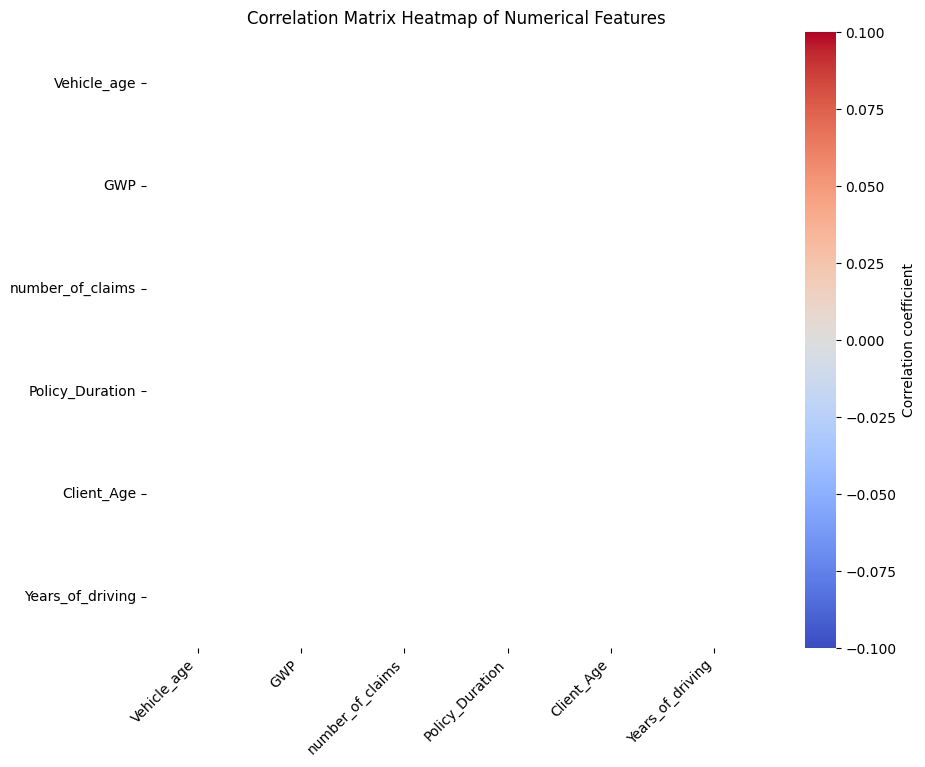

In [52]:
numerical_df = df.select_dtypes(include=[np.number])  


corr_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=corr_matrix.columns,
            yticklabels=corr_matrix.columns,
            cbar_kws={'label': 'Correlation coefficient'})

plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.title('Correlation Matrix Heatmap of Numerical Features')

plt.show()